In [1]:
from sklearn.cluster import KMeans

In [2]:
import pandas as pd

df = pd.read_csv('dadostratados.csv')

In [3]:
kmeans = KMeans(n_clusters=2).fit(df)
pred = kmeans.predict(df)

In [4]:
df.insert(4,'classe',pred,True)
df

,ip,status,metodo,recurso,classe
0,21624522189,0.4662,0.333333,0.569524,0
1,21624522189,0.4662,0.333333,0.569524,0
2,21624522189,0.4662,0.333333,0.569524,0
3,21624522189,0.4662,0.333333,0.569524,0
4,21624522189,0.4662,0.333333,0.569524,0
...,...,...,...,...,...
470327,21624522189,0.4662,0.333333,0.569524,0
470328,21624522189,0.4662,0.333333,0.569524,0
470329,21624522189,0.4662,0.333333,0.569524,0
470330,21624522189,0.4662,0.333333,0.569524,0


In [5]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [6]:
df.groupby('classe').count()

,ip,status,metodo,recurso
classe,,,,
0,459587,459587,459587,459587
1,10745,10745,10745,10745


In [7]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits import mplot3d
from matplotlib import cm
from IPython.display import clear_output

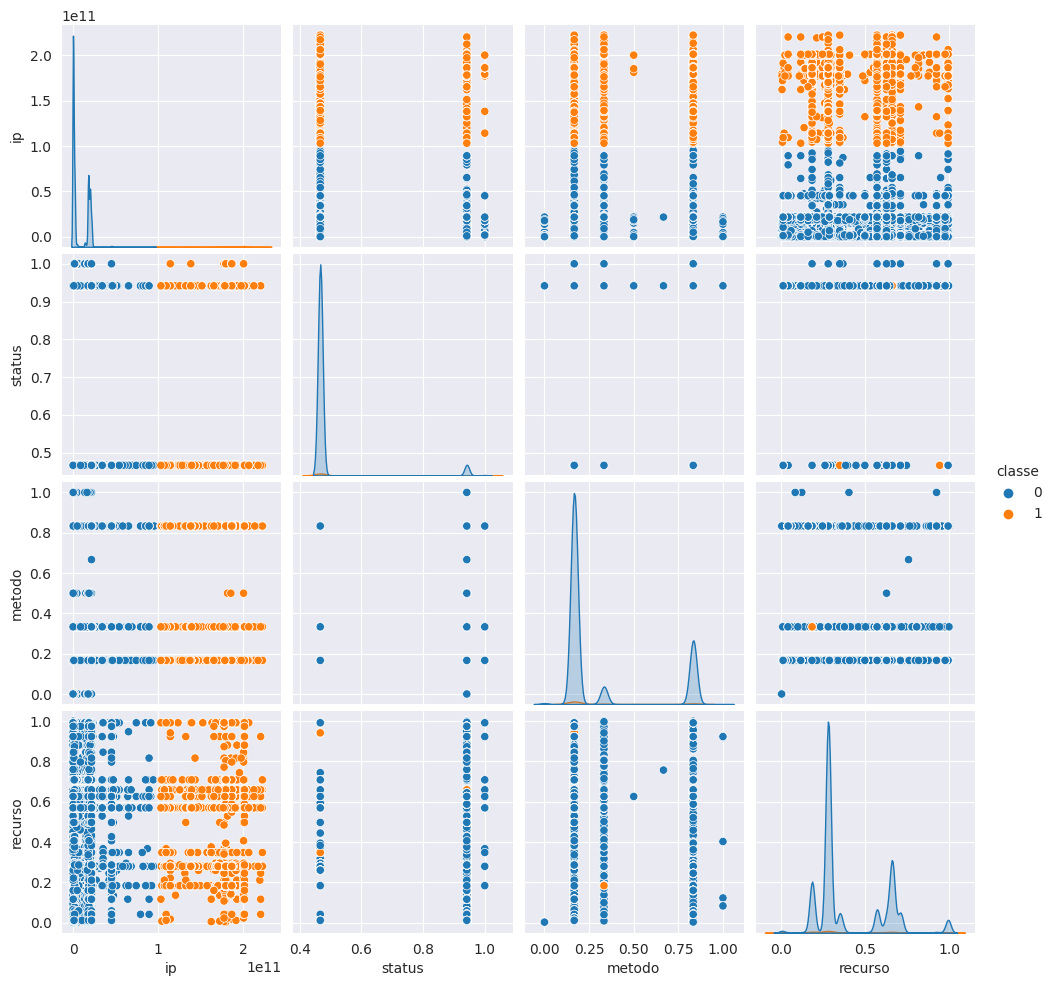

In [8]:
sns.pairplot(
    df,
    hue='classe',
    vars=[
        d for d in df.columns if d!='classe'
    ]
)

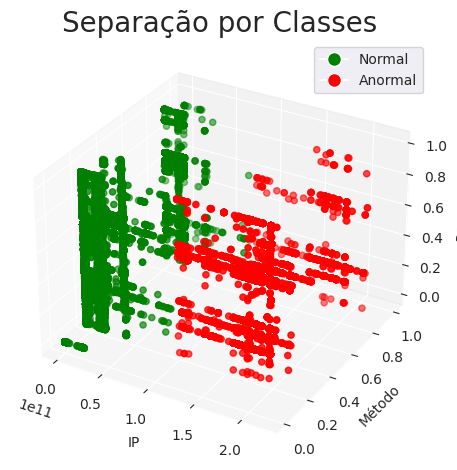

In [42]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')

colors = df['classe'].map({0:'g', 1:'r'}).values

legend_elements = [
    Line2D([0], [0],
           marker='o',
           color='w',
           label='Normal',
           markerfacecolor='g',
           markersize=10),
    Line2D([0], [0],
           marker='o',
           color='w',
           label='Anormal',
           markerfacecolor='r',
           markersize=10)
]

ax.legend(handles=legend_elements,loc='best')

plt.title('Separação por Classes', fontsize=20)
plt.xlabel('IP')
plt.ylabel('Método')
ax.set_zlabel('Recurso')

ax.scatter(
    df['ip'],
    df['metodo'],
    df['recurso'],
    c=colors
)
ax.set_facecolor("white")
plt.tight_layout()
plt.show()